In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("zomato_cleaned.csv")

In [ ]:
df.head()

,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,location_lat,location_long,order_date,weather,traffic_density,...,city_name,city_type,order_day,order_month,day_name,is_weekend,time_of_day,order_hour,distance,distance_bin
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,fog,jam,...,dehradun,metropolitian,12,2,saturday,1,dinner_peak,21,10.280582,long
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,stormy,high,...,kochi,metropolitian,13,2,sunday,1,afternoon,14,6.242319,medium
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,sandstorms,medium,...,pune,metropolitian,4,3,friday,0,evening_snacks,17,13.787860,long
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,sandstorms,low,...,ludhiana,metropolitian,13,2,sunday,1,breakfast,9,2.930258,short
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,fog,jam,...,kanpur,metropolitian,14,2,monday,0,evening_snacks,19,19.396618,very_long


In [ ]:
df.columns

Index(['rider_id', 'rider_age', 'rider_ratings', 'restaurant_lat',
       'restaurant_long', 'location_lat', 'location_long', 'order_date',
       'weather', 'traffic_density', 'vehicle_condition', 'order_type',
       'vehicle_type', 'multiple_deliveries', 'festival', 'time_taken',
       'city_name', 'city_type', 'order_day', 'order_month', 'day_name',
       'is_weekend', 'time_of_day', 'order_hour', 'distance', 'distance_bin'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43585 entries, 0 to 43584
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             43585 non-null  object 
 1   rider_age            43585 non-null  float64
 2   rider_ratings        43585 non-null  float64
 3   restaurant_lat       40100 non-null  float64
 4   restaurant_long      40100 non-null  float64
 5   location_lat         40100 non-null  float64
 6   location_long        40100 non-null  float64
 7   order_date           43585 non-null  object 
 8   weather              43585 non-null  object 
 9   traffic_density      43585 non-null  object 
 10  vehicle_condition    43585 non-null  int64  
 11  order_type           43585 non-null  object 
 12  vehicle_type         43585 non-null  object 
 13  multiple_deliveries  42652 non-null  float64
 14  festival             43368 non-null  object 
 15  time_taken           43585 non-null 

In [ ]:
# pip install mlflow dagshub

In [ ]:
import dagshub
import mlflow
dagshub.init(repo_owner='Aryanupadhyay23', repo_name='Zomato-Food-Delivery-Time-prediction', mlflow=True)

Initialized MLflow to track repo "Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction"

Repository Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction initialized!

In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow")

In [ ]:
columns_to_drop = [
    'rider_id',
    'restaurant_lat',
    'restaurant_long',
    'location_lat',
    'location_long',
    'order_date',
    'order_hour',
    'order_day',
    'distance_bin'
]

df.drop(columns=columns_to_drop, inplace=True)
df


,rider_age,rider_ratings,weather,traffic_density,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,time_taken,city_name,city_type,order_month,day_name,is_weekend,time_of_day,distance
0,36.0,4.2,fog,jam,2,snack,motorcycle,3.0,no,46,dehradun,metropolitian,2,saturday,1,dinner_peak,10.280582
1,21.0,4.7,stormy,high,1,meal,motorcycle,1.0,no,23,kochi,metropolitian,2,sunday,1,afternoon,6.242319
2,23.0,4.7,sandstorms,medium,1,drinks,scooter,1.0,no,21,pune,metropolitian,3,friday,0,evening_snacks,13.787860
3,34.0,4.3,sandstorms,low,0,buffet,motorcycle,0.0,no,20,ludhiana,metropolitian,2,sunday,1,breakfast,2.930258
4,24.0,4.7,fog,jam,1,snack,scooter,1.0,no,41,kanpur,metropolitian,2,monday,0,evening_snacks,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43580,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,32,jaipur,metropolitian,3,thursday,0,lunch_peak,1.489846
43581,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,36,agra,metropolitian,2,wednesday,0,evening_snacks,NaN
43582,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,16,chennai,metropolitian,3,friday,0,late_night,4.657195
43583,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,26,coimbatore,metropolitian,3,monday,0,lunch_peak,6.232393


In [ ]:
df.isna().sum()

,0
rider_age,0
rider_ratings,0
weather,0
traffic_density,0
vehicle_condition,0
order_type,0
vehicle_type,0
multiple_deliveries,933
festival,217
time_taken,0


## drop missing values

In [ ]:
mlflow.set_experiment("experiment 1 - drop vs impute missing values")

<Experiment: artifact_location='mlflow-artifacts:/8a08b6c74cd943398719beaed70ca939', creation_time=1770351377489, experiment_id='0', last_update_time=1770351377489, lifecycle_stage='active', name='experiment 1 - drop vs impute missing values', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [ ]:
temp_df = df.copy().dropna()

In [ ]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [ ]:
X

,rider_age,rider_ratings,weather,traffic_density,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_name,city_type,order_month,day_name,is_weekend,time_of_day,distance
0,36.0,4.2,fog,jam,2,snack,motorcycle,3.0,no,dehradun,metropolitian,2,saturday,1,dinner_peak,10.280582
1,21.0,4.7,stormy,high,1,meal,motorcycle,1.0,no,kochi,metropolitian,2,sunday,1,afternoon,6.242319
2,23.0,4.7,sandstorms,medium,1,drinks,scooter,1.0,no,pune,metropolitian,3,friday,0,evening_snacks,13.787860
3,34.0,4.3,sandstorms,low,0,buffet,motorcycle,0.0,no,ludhiana,metropolitian,2,sunday,1,breakfast,2.930258
4,24.0,4.7,fog,jam,1,snack,scooter,1.0,no,kanpur,metropolitian,2,monday,0,evening_snacks,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43579,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,ranchi,metropolitian,3,tuesday,0,dinner_peak,16.600272
43580,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,jaipur,metropolitian,3,thursday,0,lunch_peak,1.489846
43582,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,chennai,metropolitian,3,friday,0,late_night,4.657195
43583,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,coimbatore,metropolitian,3,monday,0,lunch_peak,6.232393


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    MinMaxScaler
)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(30444, 16)

In [ ]:
X_train.isna().sum()

,0
rider_age,0
rider_ratings,0
weather,0
traffic_density,0
vehicle_condition,0
order_type,0
vehicle_type,0
multiple_deliveries,0
festival,0
city_name,0


In [ ]:
X_test.shape

(7611, 16)

In [ ]:
y_train

,time_taken
7997,16
16083,53
29424,27
40177,34
6821,42
...,...
19246,18
7206,15
12930,37
994,33


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38055 entries, 0 to 43584
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_age            38055 non-null  float64
 1   rider_ratings        38055 non-null  float64
 2   weather              38055 non-null  object 
 3   traffic_density      38055 non-null  object 
 4   vehicle_condition    38055 non-null  int64  
 5   order_type           38055 non-null  object 
 6   vehicle_type         38055 non-null  object 
 7   multiple_deliveries  38055 non-null  float64
 8   festival             38055 non-null  object 
 9   time_taken           38055 non-null  int64  
 10  city_name            38055 non-null  object 
 11  city_type            38055 non-null  object 
 12  order_month          38055 non-null  int64  
 13  day_name             38055 non-null  object 
 14  is_weekend           38055 non-null  int64  
 15  time_of_day          38055 non-null  obje

In [ ]:
num_cols = ["rider_age","rider_ratings","distance"]

nominal_cat_cols = ["weather","order_type","vehicle_type","festival","city_type","city_name","order_month","day_name","is_weekend","time_of_day"]

ordinal_cat_cols = ["traffic_density"]

In [ ]:
X_train["traffic_density"].unique()

array(['low', 'jam', 'medium', 'high'], dtype=object)

In [ ]:
traffic_order = ["low","medium","high","jam"]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols),
        (
            "nominal_encoder",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols
        ),
        (
            "ordinal_encoder",
            OrdinalEncoder(categories=[traffic_order]),
            ordinal_cat_cols
        )
    ],
    remainder="passthrough",
    n_jobs=-1,
    force_int_remainder_cols=False,
    verbose_feature_names_out=False
)

preprocessor.set_output(transform="pandas")


ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['rider_age', 'rider_ratings', 'distance']),
                                ('nominal_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'order_type', 'vehicle_type',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'day_name', 'is_weekend',
                                  'time_of_day']),
                                ('ordinal_encoder',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam']]),
                                 ['traffic_density'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

,rider_age,rider_ratings,distance,weather_cloudy,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,order_type_buffet,...,is_weekend_1,time_of_day_afternoon,time_of_day_breakfast,time_of_day_dinner_peak,time_of_day_evening_snacks,time_of_day_late_night,time_of_day_lunch_peak,traffic_density,vehicle_condition,multiple_deliveries
7997,-0.282097,1.164633,-1.211247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0
16083,1.454428,0.849370,0.717574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0,3.0
29424,-0.455749,0.218843,0.144911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1.0
40177,1.280776,-1.988001,-0.385292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1.0
6821,0.759818,-0.726947,0.689886,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19246,-1.671317,1.164633,-1.203960,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
7206,-0.976707,-1.672737,-0.932219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
12930,-0.976707,-1.672737,0.653365,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0,1.0
994,1.454428,-1.357474,0.757606,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2,2.0


In [ ]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lg = LGBMRegressor()
lg.fit(X_train_trans, y_train_pt)

/usr/local/lib/python3.12/dist-packages/lightgbm/basic.py:374: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 30444, number of used features: 64
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor()

In [ ]:
y_pred_train = lg.predict(X_train_trans)
y_pred_test = lg.predict(X_test_trans)

In [ ]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")


The train error is 2.92 minutes
The test error is 3.04 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")


The train r2 score is 0.85
The test r2 score is 0.84


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lg, X_train_trans, y_train_pt.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

array([0.82469151, 0.82313846, 0.82665697, 0.8242343 , 0.82364709])

In [ ]:
scores.mean()

np.float64(0.8244736657998442)

In [ ]:
with mlflow.start_run(run_name='missing values dropped'):
  mlflow.log_param("experiment_type","missing values dropped")
  mlflow.log_params(lg.get_params())

  mlflow.log_metric("training_error", mean_absolute_error(y_train, y_pred_train_org))
  mlflow.log_metric("test_error", mean_absolute_error(y_test, y_pred_test_org))
  mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train_org))
  mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test_org))
  mlflow.log_metric("cross_val", scores.mean())


🏃 View run missing values dropped at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0/runs/537ff428c58f4a4cb713da3694f8e074
🧪 View experiment at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_trans,y_train_pt)

LinearRegression()

In [ ]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

In [ ]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")


The train error is 4.70 minutes
The test error is 4.72 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")


The train r2 score is 0.60
The test r2 score is 0.59


## impute missing values

In [ ]:
temp_df = df.copy()

In [ ]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.isna().sum()

,0
rider_age,0
rider_ratings,0
weather,0
traffic_density,0
vehicle_condition,0
order_type,0
vehicle_type,0
multiple_deliveries,730
festival,174
city_name,0


In [ ]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

## multiple_deliveries

In [ ]:
X_train["multiple_deliveries"].isna().sum()

np.int64(730)

In [ ]:
X_train["multiple_deliveries"].value_counts()

,count
multiple_deliveries,
1.0,21416
0.0,10930
2.0,1535
3.0,257


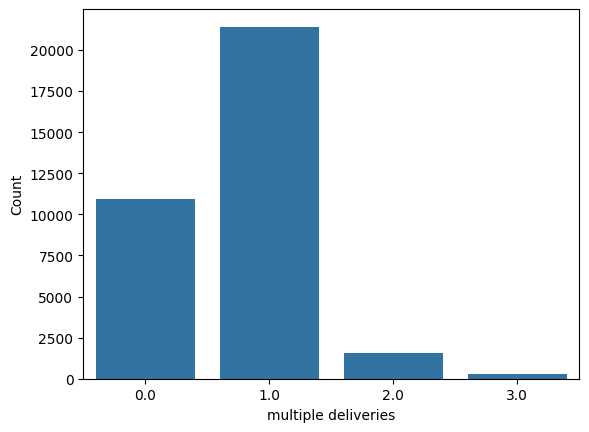

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='multiple_deliveries', data=X_train)
plt.xlabel('multiple deliveries')
plt.ylabel('Count')
plt.show()

using mode

In [ ]:
"""
X_train['multiple_deliveries'].fillna(1, inplace=True) """

"\nX_train['multiple_deliveries'].fillna(1, inplace=True) "

using ratio values

In [ ]:
def impute_by_ratio(df, column_name):
    """
    Fills missing values in a column based on the probability distribution
    of the existing non-null values.
    """
    probs = df[column_name].value_counts(normalize=True)

    missing_mask = df[column_name].isnull()
    num_missing = missing_mask.sum()

    if num_missing == 0:
        print(f"No missing values found in {column_name}.")
        return df

    np.random.seed(42)
    fill_values = np.random.choice(
        probs.index,
        size=num_missing,
        p=probs.values
    )

    df.loc[missing_mask, column_name] = fill_values

    return df


In [ ]:
# Apply ratio-based imputation
X_train_after = impute_by_ratio(X_train, "multiple_deliveries")

In [ ]:
before_pct = (
    X_train["multiple_deliveries"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

after_pct = (
    X_train_after["multiple_deliveries"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

comparison = (
    pd.DataFrame({
        "Before (%)": before_pct,
        "After (%)": after_pct
    })
    .fillna(0)
)

comparison


,Before (%),After (%)
multiple_deliveries,,
1.0,62.74,62.74
0.0,31.99,31.99
2.0,4.52,4.52
3.0,0.75,0.75


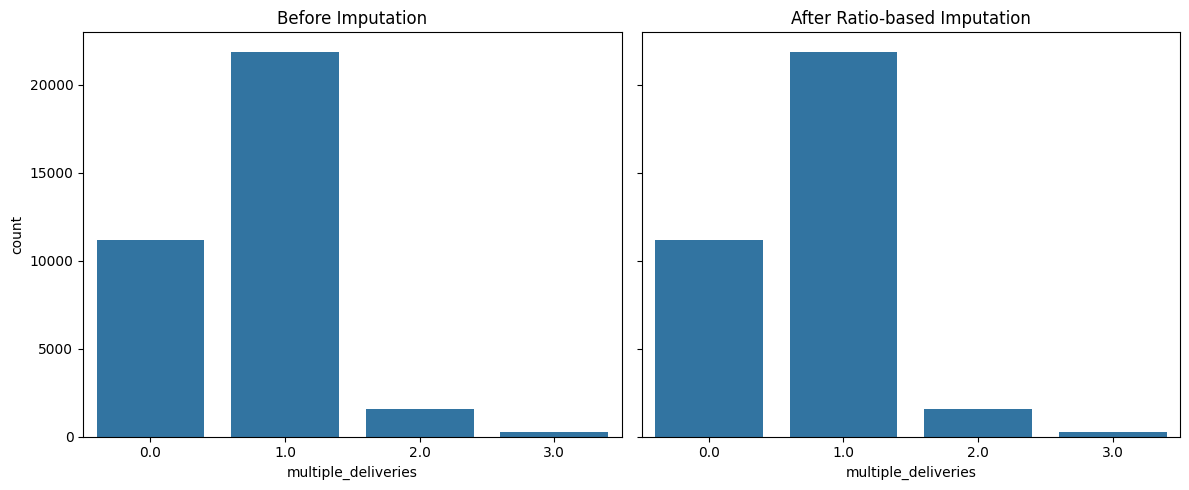

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(
    x="multiple_deliveries",
    data=X_train,
    ax=axes[0]
)
axes[0].set_title("Before Imputation")

sns.countplot(
    x="multiple_deliveries",
    data=X_train_after,
    ax=axes[1]
)
axes[1].set_title("After Ratio-based Imputation")

plt.tight_layout()
plt.show()


## festival

In [ ]:
X_train["festival"].isna().sum()

np.int64(174)

In [ ]:
# Check the counts of existing values
print(X_train['festival'].value_counts(dropna=False))

festival
no     34018
yes      676
NaN      174
Name: count, dtype: int64


In [ ]:
X_train['festival'] = X_train['festival'].fillna('no')

## city_type

In [ ]:
X_train["city_type"].isna().sum()

np.int64(925)

In [ ]:
X_train["city_type"].value_counts()

,count
city_type,
metropolitian,26071
urban,7754
semi-urban,118


In [ ]:
X_train["city_type"].unique()

array(['urban', 'metropolitian', nan, 'semi-urban'], dtype=object)

In [ ]:
X_train["city_name"].unique()

array(['ludhiana', 'mysore', 'mumbai', 'vadodara', 'chennai', 'surat',
       'kolkata', 'bangalore', 'ranchi', 'indore', 'dehradun', 'pune',
       'jaipur', 'hyderabad', 'kochi', 'coimbatore', 'bhopal', 'agra',
       'kanpur', 'aurangabad', 'prayagraj', 'goa'], dtype=object)

In [ ]:
def impute_city_type_from_city_name(df):
    """
    Fill missing city_type values using city_name mapping.
    """

    # Create mapping from available data
    city_type_map = (
        df.dropna(subset=["city_type"])
          .groupby("city_name")["city_type"]
          .agg(lambda x: x.mode().iloc[0])
    )

    # Fill missing city_type using city_name
    mask = df["city_type"].isna()
    df.loc[mask, "city_type"] = df.loc[mask, "city_name"].map(city_type_map)

    return df["city_type"].isna().sum()

In [ ]:
impute_city_type_from_city_name(X_train)

np.int64(0)

## distance

In [ ]:
X_train['distance'].isna().sum()

np.int64(2806)

In [ ]:
X_train["distance"].describe()

,distance
count,32062.000000
mean,9.711153
std,5.598367
min,1.465067
25%,4.657672
50%,9.193014
75%,13.631331
max,20.969489


In [ ]:
def impute_distance(df):
    # City-level median
    df["distance"] = (
        df.groupby("city_name")["distance"]
          .transform(lambda x: x.fillna(x.median()))
    )

    # Global fallback
    df["distance"] = df["distance"].fillna(df["distance"].median())

    return df


In [ ]:
X_train_after = impute_distance(X_train)

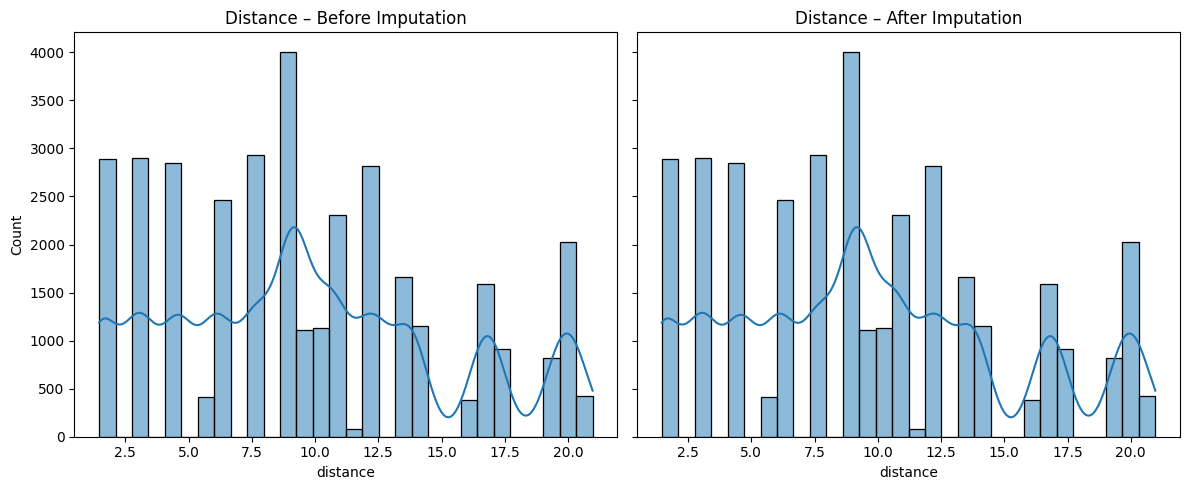

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(
    X_train["distance"],
    bins=30,
    kde=True,
    ax=axes[0]
)
axes[0].set_title("Distance – Before Imputation")

sns.histplot(
    X_train_after["distance"],
    bins=30,
    kde=True,
    ax=axes[1]
)
axes[1].set_title("Distance – After Imputation")

plt.tight_layout()
plt.show()

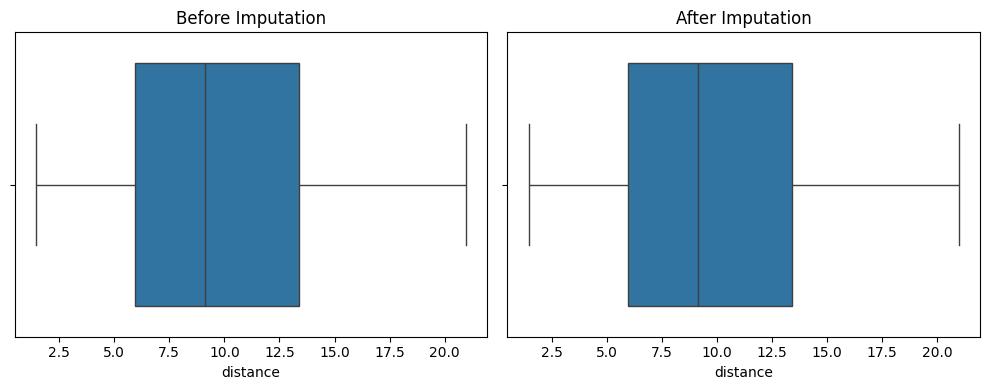

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.boxplot(x=X_train["distance"], ax=axes[0])
axes[0].set_title("Before Imputation")

sns.boxplot(x=X_train_after["distance"], ax=axes[1])
axes[1].set_title("After Imputation")

plt.tight_layout()
plt.show()


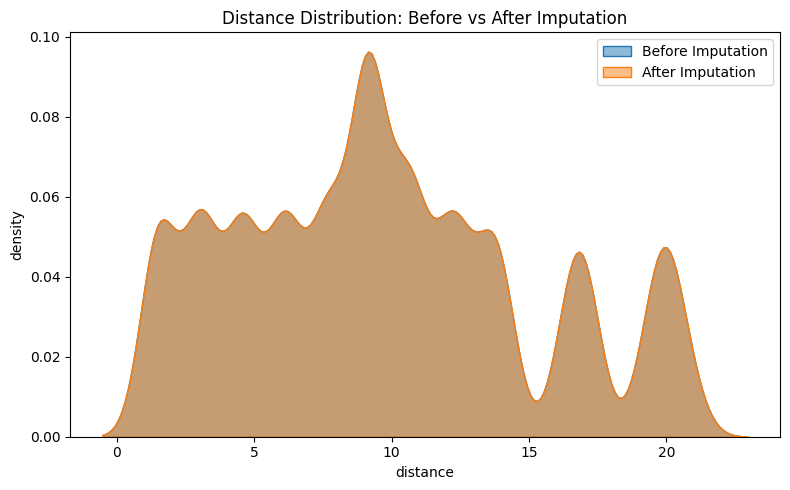

In [ ]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    X_train["distance"],
    label="Before Imputation",
    fill=True,
    alpha=0.5
)

sns.kdeplot(
    X_train_after["distance"],
    label="After Imputation",
    fill=True,
    alpha=0.5
)

plt.title("Distance Distribution: Before vs After Imputation")
plt.xlabel("distance")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame({
    "Before": X_train["distance"].describe(),
    "After": X_train_after["distance"].describe()
})

,Before,After
count,34868.000000,34868.000000
mean,9.682672,9.682672
std,5.371158,5.371158
min,1.465067,1.465067
25%,5.952905,5.952905
50%,9.121519,9.121519
75%,13.406355,13.406355
max,20.969489,20.969489


## using mean

In [ ]:
distance_mean = X_train["distance"].mean()

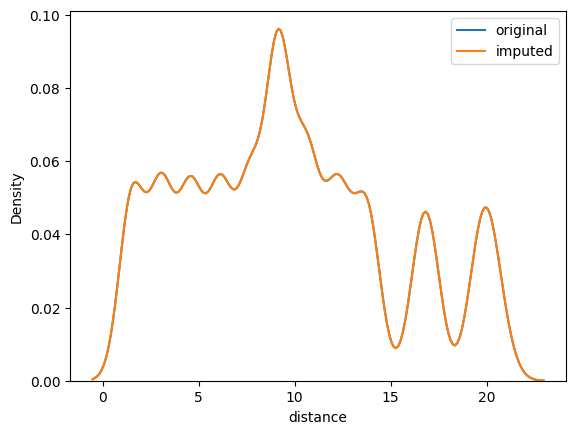

In [ ]:
sns.kdeplot(X_train['distance'], label='original')
sns.kdeplot(X_train['distance'].fillna(distance_mean), label='imputed')
plt.legend()


In [ ]:
X_train["distance"].isna().sum()
X_train["distance"].fillna(distance_mean).isna().sum()


np.int64(0)

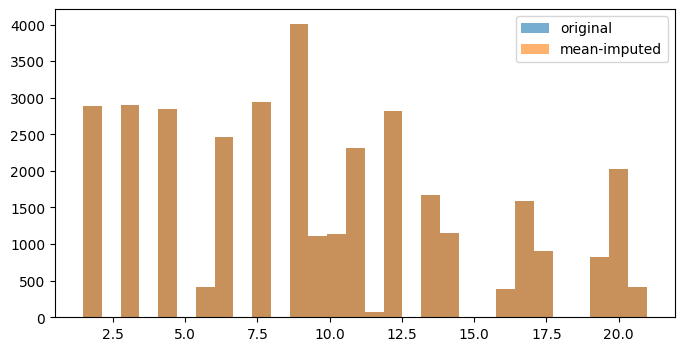

In [ ]:
plt.figure(figsize=(8,4))

plt.hist(
    X_train["distance"].dropna(),
    bins=30,
    alpha=0.6,
    label="original"
)

plt.hist(
    X_train["distance"].fillna(distance_mean),
    bins=30,
    alpha=0.6,
    label="mean-imputed"
)

plt.legend()
plt.show()


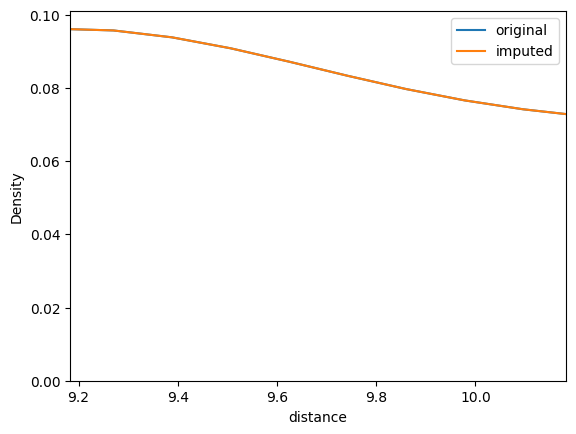

In [ ]:
mean_val = X_train["distance"].mean()

sns.kdeplot(X_train["distance"], label="original")
sns.kdeplot(X_train["distance"].fillna(mean_val), label="imputed")

plt.xlim(mean_val - 0.5, mean_val + 0.5)
plt.legend()
plt.show()


In [ ]:
X_train.isna().sum()

,0
rider_age,0
rider_ratings,0
weather,0
traffic_density,0
vehicle_condition,0
order_type,0
vehicle_type,0
multiple_deliveries,0
festival,0
city_name,0


## Imputation Pipeline

In [ ]:
nominal_cat_cols

['weather',
 'order_type',
 'vehicle_type',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'day_name',
 'is_weekend',
 'time_of_day']

In [ ]:
X_train.isna().sum()

,0
rider_age,0
rider_ratings,0
weather,0
traffic_density,0
vehicle_condition,0
order_type,0
vehicle_type,0
multiple_deliveries,0
festival,0
city_name,0


In [ ]:
def impute_multiple_deliveries_by_ratio(df, column_name="multiple_deliveries", seed=42):
    probs = df[column_name].value_counts(normalize=True)

    missing_mask = df[column_name].isna()
    n_missing = missing_mask.sum()

    if n_missing == 0:
        return df

    np.random.seed(seed)
    df.loc[missing_mask, column_name] = np.random.choice(
        probs.index,
        size=n_missing,
        p=probs.values
    )

    return df


In [ ]:
def impute_festival_mode(df):
    mode_value = df["festival"].mode()[0]
    df["festival"] = df["festival"].fillna(mode_value)
    return df

In [ ]:
def impute_city_type_from_city_name(df):
    city_type_map = (
        df.dropna(subset=["city_type"])
          .groupby("city_name")["city_type"]
          .agg(lambda x: x.mode().iloc[0])
    )

    mask = df["city_type"].isna()
    df.loc[mask, "city_type"] = df.loc[mask, "city_name"].map(city_type_map)

    return df


In [ ]:
def impute_distance(df):
    # City-level median
    df["distance"] = (
        df.groupby("city_name")["distance"]
          .transform(lambda x: x.fillna(x.median()))
    )

    # Global fallback (for unseen cities / all-missing cities)
    df["distance"] = df["distance"].fillna(df["distance"].median())

    return df


In [ ]:
from sklearn.preprocessing import FunctionTransformer
def simple_imputation_pipeline(df):
    df = impute_multiple_deliveries_by_ratio(df)
    df = impute_festival_mode(df)
    df = impute_city_type_from_city_name(df)
    df = impute_distance(df)
    return df

In [ ]:
simple_imputation_pipeline(X_train)

,rider_age,rider_ratings,weather,traffic_density,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_name,city_type,order_month,day_name,is_weekend,time_of_day,distance
35421,32.0,4.8,sunny,low,2,buffet,scooter,0.0,no,ludhiana,urban,2,friday,0,breakfast,2.930418
1510,29.0,4.8,fog,high,2,meal,motorcycle,1.0,no,mysore,metropolitian,3,wednesday,0,lunch_peak,1.554509
7729,22.0,4.9,windy,medium,1,snack,scooter,1.0,no,mumbai,metropolitian,3,thursday,0,evening_snacks,12.240858
38572,33.0,4.8,sandstorms,medium,2,meal,scooter,1.0,no,vadodara,urban,3,wednesday,0,evening_snacks,16.660108
21855,27.0,5.0,cloudy,medium,2,meal,scooter,1.0,no,chennai,metropolitian,3,wednesday,0,evening_snacks,9.313348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,31.0,4.7,cloudy,jam,1,drinks,motorcycle,1.0,no,hyderabad,metropolitian,3,monday,0,dinner_peak,9.220450
11284,21.0,4.6,cloudy,low,1,buffet,scooter,1.0,no,mysore,metropolitian,3,sunday,1,dinner_peak,12.434914
38158,25.0,4.9,cloudy,low,2,snack,scooter,1.0,no,bangalore,metropolitian,3,wednesday,0,late_night,10.868240
860,38.0,4.1,fog,medium,1,buffet,motorcycle,2.0,no,pune,metropolitian,3,monday,0,evening_snacks,10.725453


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols),
        ("nominal_encode", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nominal_cat_cols),
        ("ordinal_encode", OrdinalEncoder(
            categories=[traffic_order],
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), ordinal_cat_cols)
    ],
    remainder="drop",
    force_int_remainder_cols=False,
    verbose_feature_names_out=False
)


In [ ]:
preprocessor.fit_transform(X_train)

array([[ 0.42882569,  0.52281483, -1.25714992, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09249318,  0.52281483, -1.5133199 , ...,  0.        ,
         1.        ,  2.        ],
       [-1.30890387,  0.84062908,  0.47628892, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.78758501,  0.84062908,  0.22073175, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.47146342, -1.70188491,  0.19414734, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12391751, -0.43062792, -0.10454803, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def custom_imputation(df):
    df = impute_multiple_deliveries_by_ratio(df)
    df = impute_festival_mode(df)
    df = impute_city_type_from_city_name(df)
    df = impute_distance(df)
    return df

In [ ]:
imputation_transformer = FunctionTransformer(
    custom_imputation,
    validate=False,
    feature_names_out="one-to-one"
)

In [ ]:
processing_pipeline = Pipeline(
    steps=[
        ("imputation", imputation_transformer),
        ("preprocess", preprocessor)
    ]
)

In [ ]:
processing_pipeline.fit_transform(X_train)

array([[ 0.42882569,  0.52281483, -1.25714992, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09249318,  0.52281483, -1.5133199 , ...,  0.        ,
         1.        ,  2.        ],
       [-1.30890387,  0.84062908,  0.47628892, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.78758501,  0.84062908,  0.22073175, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.47146342, -1.70188491,  0.19414734, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12391751, -0.43062792, -0.10454803, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
lr = LinearRegression()
model_pipe = Pipeline(
    steps=[
        ("preprocessing",processing_pipeline),
        ("model",lr)
    ]
)
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73e016660>)),
                                 ('preprocess',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'rider_ratings',
                                                                    'distance']),
                                                                  ('nominal_encode',
                                                                   OneHotEncoder(handle_u...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LinearRegression())])

In [ ]:
model_pipe.fit(X_train,y_train_pt)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73e016660>)),
                                 ('preprocess',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'rider_ratings',
                                                                    'distance']),
                                                                  ('nominal_encode',
                                                                   OneHotEncoder(handle_u...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LinearRegression())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [ ]:
# get the actual predictions values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")

The train error is 5.04 minutes
The test error is 5.04 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")

The train r2 score is 0.54
The test r2 score is 0.53


In [ ]:
lg = LGBMRegressor()
model_pipe = Pipeline(
    steps=[
        ("preprocessing",processing_pipeline),
        ("model",lg)
    ]
)
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73e016660>)),
                                 ('preprocess',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'rider_ratings',
                                                                    'distance']),
                                                                  ('nominal_encode',
                                                                   OneHotEncoder(handle_u...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LGBMRegressor())])

In [ ]:
model_pipe.fit(X_train,y_train_pt)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 34868, number of used features: 62
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73e016660>)),
                                 ('preprocess',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'rider_ratings',
                                                                    'distance']),
                                                                  ('nominal_encode',
                                                                   OneHotEncoder(handle_u...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LGBMRegressor())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# get the actual predictions values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")

The train error is 3.51 minutes
The test error is 3.67 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")

The train r2 score is 0.77
The test r2 score is 0.75


In [ ]:
with mlflow.start_run(run_name="missing values imputed"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type", "missing values imputed")

    # log model params
    mlflow.log_params(lg.get_params())

    # log metrics
    mlflow.log_metric("training_error", mean_absolute_error(y_train, y_pred_train_org))
    mlflow.log_metric("test_error", mean_absolute_error(y_test, y_pred_test_org))
    mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train_org))
    mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test_org))
    mlflow.log_metric("cross_val", scores.mean())


🏃 View run missing values imputed at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0/runs/8832a86700754d2bb7a1a229938a8f08
🧪 View experiment at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0


## adding missing indicator

In [ ]:
MISSING_COLS = [
    "multiple_deliveries",
    "festival",
    "city_type",
    "distance"
]


In [ ]:
def add_missing_indicators(df, columns=MISSING_COLS):
    df = df.copy()
    for col in columns:
        df[f"{col}_missing"] = df[col].isna().astype(int)
    return df


In [ ]:
missing_indicator_transformer = FunctionTransformer(
    add_missing_indicators,
    validate=False,
    feature_names_out=None
)

In [ ]:
def custom_imputation(df):
    df = impute_multiple_deliveries_by_ratio(df)
    df = impute_festival_mode(df)
    df = impute_city_type_from_city_name(df)
    df = impute_distance(df)
    return df


In [ ]:
imputation_transformer = FunctionTransformer(
    custom_imputation,
    validate=False,
    feature_names_out="one-to-one"
)


In [ ]:
num_cols_with_indicators = num_cols + [
    f"{col}_missing" for col in MISSING_COLS
]


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols_with_indicators),

        ("nominal_encode",
         OneHotEncoder(handle_unknown="ignore", sparse_output=False),
         nominal_cat_cols),

        ("ordinal_encode",
         OrdinalEncoder(
             categories=[traffic_order],
             handle_unknown="use_encoded_value",
             unknown_value=-1
         ),
         ordinal_cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)


In [ ]:
processing_pipeline = Pipeline(
    steps=[
        ("missing_indicators", missing_indicator_transformer),
        ("imputation", imputation_transformer),
        ("preprocess", preprocessor)
    ]
)


In [ ]:
processing_pipeline.fit_transform(X_train)

array([[ 0.42882569,  0.52281483, -1.25714992, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09249318,  0.52281483, -1.5133199 , ...,  0.        ,
         1.        ,  2.        ],
       [-1.30890387,  0.84062908,  0.47628892, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.78758501,  0.84062908,  0.22073175, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.47146342, -1.70188491,  0.19414734, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12391751, -0.43062792, -0.10454803, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
lg = LGBMRegressor()
model_pipe = Pipeline(
    steps=[
        ("preprocessing",processing_pipeline),
        ("model",lg)
    ]
)
model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('missing_indicators',
                                  FunctionTransformer(func=<function add_missing_indicators at 0x79a73efba200>)),
                                 ('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73efb9260>)),
                                 ('preprocess',
                                  ColumnTransformer(transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'r...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LGBMRegressor())])

In [ ]:
model_pipe.fit(X_train,y_train_pt)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 34868, number of used features: 62
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('missing_indicators',
                                  FunctionTransformer(func=<function add_missing_indicators at 0x79a73efba200>)),
                                 ('imputation',
                                  FunctionTransformer(feature_names_out='one-to-one',
                                                      func=<function custom_imputation at 0x79a73efb9260>)),
                                 ('preprocess',
                                  ColumnTransformer(transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['rider_age',
                                                                    'r...
                                                                                 sparse_output=False),
                                                                   ['weather',
                                                                    'order_type',
                                                                    'vehicle_type',
                                                                    'festival',
                                                                    'city_type',
                                                                    'city_name',
                                                                    'order_month',
                                                                    'day_name',
                                                                    'is_weekend',
                                                                    'time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic_density'])],
                                                    verbose_feature_names_out=False))])),
                ('model', LGBMRegressor())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# get the actual predictions values
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train, y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test, y_pred_test_org):.2f} minutes")

The train error is 3.51 minutes
The test error is 3.67 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test, y_pred_test_org):.2f}")

The train r2 score is 0.77
The test r2 score is 0.75


In [ ]:
with mlflow.start_run(run_name="missing values imputed"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type", "missing indicator")

    # log model params
    mlflow.log_params(lg.get_params())

    # log metrics
    mlflow.log_metric("training_error", mean_absolute_error(y_train, y_pred_train_org))
    mlflow.log_metric("test_error", mean_absolute_error(y_test, y_pred_test_org))
    mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train_org))
    mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test_org))
    mlflow.log_metric("cross_val", scores.mean())


🏃 View run missing values imputed at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0/runs/6d497641d0cd417ba44bcfd239b34b7a
🧪 View experiment at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0


# imputing only city_type

In [ ]:
X = df.drop(columns="time_taken")
y = df["time_taken"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [ ]:
def build_city_type_map(df):
    return (
        df.dropna(subset=["city_type"])
          .groupby("city_name")["city_type"]
          .agg(lambda x: x.mode().iloc[0])
    )

def apply_city_type_imputation(df, city_type_map):
    df = df.copy()
    mask = df["city_type"].isna()
    df.loc[mask, "city_type"] = df.loc[mask, "city_name"].map(city_type_map)
    return df


In [ ]:
city_type_map = build_city_type_map(X_train)

X_train = apply_city_type_imputation(X_train, city_type_map)
X_test = apply_city_type_imputation(X_test, city_type_map)


In [ ]:
train_mask = X_train.notna().all(axis=1)
test_mask = X_test.notna().all(axis=1)

X_train = X_train.loc[train_mask]
y_train = y_train.loc[train_mask]

X_test = X_test.loc[test_mask]
y_test = y_test.loc[test_mask]


In [ ]:
num_cols = ["rider_age", "rider_ratings", "distance"]

nominal_cat_cols = [
    "weather",
    "order_type",
    "vehicle_type",
    "festival",
    "city_type",
    "city_name",
    "order_month",
    "day_name",
    "is_weekend",
    "time_of_day"
]

ordinal_cat_cols = ["traffic_density"]
traffic_order = ["low", "medium", "high", "jam"]


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols),
        (
            "nominal_encode",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols
        ),
        (
            "ordinal_encode",
            OrdinalEncoder(categories=[traffic_order]),
            ordinal_cat_cols
        )
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocessor.set_output(transform="pandas")


ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['rider_age', 'rider_ratings', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'order_type', 'vehicle_type',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'day_name', 'is_weekend',
                                  'time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam']]),
                                 ['traffic_density'])],
                  verbose_feature_names_out=False)

In [ ]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_pt = pt.transform(y_test.values.reshape(-1, 1)).ravel()


In [ ]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)


In [ ]:
model = LGBMRegressor(random_state=42)
model.fit(X_train_trans, y_train_pt)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 31240, number of used features: 62
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(random_state=42)

In [ ]:
y_pred_train_pt = model.predict(X_train_trans)
y_pred_test_pt = model.predict(X_test_trans)

y_pred_train = pt.inverse_transform(y_pred_train_pt.reshape(-1, 1))
y_pred_test = pt.inverse_transform(y_pred_test_pt.reshape(-1, 1))


In [ ]:
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")

print(f"Train R2: {r2_score(y_train, y_pred_train):.2f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.2f}")


Train MAE: 3.41
Test MAE: 3.55
Train R2: 0.79
Test R2: 0.77


In [ ]:
full_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LGBMRegressor(random_state=42))
    ]
)

cv_scores = cross_val_score(
    full_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

print(f"CV R2 mean: {cv_scores.mean():.3f}")


CV R2 mean: 0.773


In [ ]:
with mlflow.start_run(run_name="imputing city_type"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type", "imputing city_type ")

    # log model params
    mlflow.log_params(model.get_params())

    # log metrics
    mlflow.log_metric("training_error", mean_absolute_error(y_train, y_pred_train))
    mlflow.log_metric("test_error", mean_absolute_error(y_test, y_pred_test))
    mlflow.log_metric("training_r2", r2_score(y_train, y_pred_train))
    mlflow.log_metric("test_r2", r2_score(y_test, y_pred_test))
    mlflow.log_metric("cross_val", cv_scores.mean())

🏃 View run imputing city_type at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0/runs/3887d9fae1ba4a05a9c32c1e46cbf399
🧪 View experiment at: https://dagshub.com/Aryanupadhyay23/Zomato-Food-Delivery-Time-prediction.mlflow/#/experiments/0
